In [267]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [268]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [269]:
train=pd.read_csv('C:/Users/hp/Desktop/Analytics Vidhya/Twitter Sentiment Analysis/train_E6oV3lV.csv')
test=pd.read_csv('C:/Users/hp/Desktop/Analytics Vidhya/Twitter Sentiment Analysis/test_tweets_anuFYb8.csv')


In [270]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [271]:
#check few non racist tweet
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [272]:
#check few  racist tweet
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [273]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [274]:
train['label'].value_counts()/31962

0    0.929854
1    0.070146
Name: label, dtype: float64

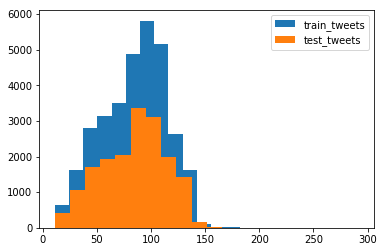

In [275]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label='train_tweets')
plt.hist(length_test,bins=20,label='test_tweets')
plt.legend()
plt.show()

In [276]:
train['tweet']=train['tweet'].str.replace('@[\w]*',' ')
test['tweet']=test['tweet'].str.replace('@[\w]*',' ')
#Removing Twitter Handles (@user)

In [277]:
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [278]:
train['tweet']=train['tweet'].str.replace('[^a-zA-Z#]',' ')
test['tweet']=test['tweet'].str.replace('[^a-zA-Z#]',' ')
#Removing Punctuations, Numbers, and Special Characters

In [279]:
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ur
4,5,0,factsguide society now #motivation


In [280]:
train['tweet']=train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['tweet']=test['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#for lowercasing


In [281]:
#nltk.download('stopwords')

In [282]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
train['tweet']=train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['tweet']=test['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#for removing stopwords
train.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfunction #run
1,2,0,thanks #lyft credit use cause offer wheelchair vans pdx #disapointed #getthanked
2,3,0,bihday majesty
3,4,0,#model love u take u time ur
4,5,0,factsguide society #motivation


In [283]:
freq=pd.Series(' '.join(train['tweet']).split()).value_counts()[:15]
freq
#top 15 common words

day          2104
amp          1777
happy        1587
#love        1541
#            1323
love         1220
u            1185
time         1102
like         1030
today        1019
new           930
get           919
#positive     878
people        822
good          797
dtype: int64

In [284]:
rare_freq=pd.Series(' '.join(train['tweet']).split()).value_counts()[:-15]
rare_freq
#top 15 rare words

day              2104
amp              1777
happy            1587
#love            1541
#                1323
love             1220
u                1185
time             1102
like             1030
today            1019
new               930
get               919
#positive         878
people            822
good              797
one               788
see               758
life              743
go                653
want              651
take              618
bihday            584
#healthy          573
#smile            557
make              540
got               527
father            513
way               511
need              510
bull              504
                 ... 
#empowered          1
#thatface           1
#edengardens        1
#deceitful          1
#humid              1
camgirls            1
recreational        1
#yorku              1
#whitoutelena       1
#coyote             1
pofolios            1
filme               1
ussda               1
backsea             1
kabee     

In [285]:
train['tweet']=train['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['tweet']=test['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#Removing Short Words

In [286]:
train.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfunction #run
1,2,0,thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,3,0,bihday majesty
3,4,0,#model love take time
4,5,0,factsguide society #motivation


In [287]:
#text tokenization
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet_test = test['tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                      [father, dysfunctional, selfish, drags, kids, dysfunction, #run]
1    [thanks, #lyft, credit, cause, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, majesty]
3                                                            [#model, love, take, time]
4                                                    [factsguide, society, #motivation]
Name: tweet, dtype: object

In [288]:
#normalize the tokenized tweets
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet_test= tokenized_tweet_test.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [289]:
tokenized_tweet.head()

0                         [father, dysfunct, selfish, drag, kid, dysfunct, #run]
1    [thank, #lyft, credit, caus, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, majesti]
3                                                     [#model, love, take, time]
4                                                   [factsguid, societi, #motiv]
Name: tweet, dtype: object

In [290]:
#now detokenize 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
train['tweet']=tokenized_tweet

#now detokenize for test
for i in range(len(tokenized_tweet_test)):
    tokenized_tweet_test[i]=' '.join(tokenized_tweet_test[i])
test['tweet']=tokenized_tweet_test

In [291]:
tokenized_tweet.head()

0                       father dysfunct selfish drag kid dysfunct #run
1    thank #lyft credit caus offer wheelchair van #disapoint #getthank
2                                                       bihday majesti
3                                                #model love take time
4                                             factsguid societi #motiv
Name: tweet, dtype: object

In [292]:
#!pip install wordcloud

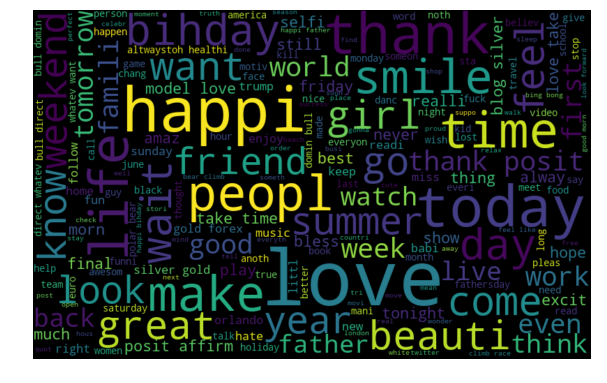

In [293]:
#common words used in the tweets: WordCloud
all_words = ' '.join([text for text in train['tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()


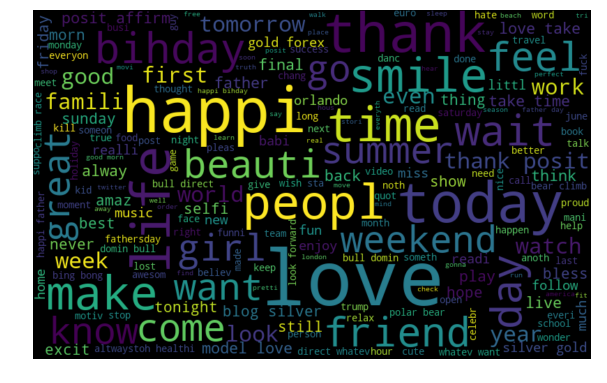

In [294]:
#Words in non racist/sexist tweets
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

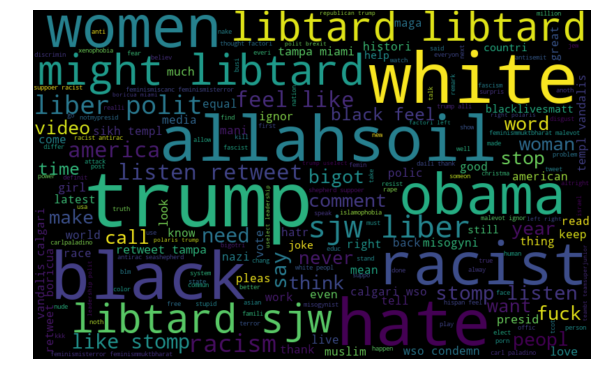

In [295]:
#Words in racist/sexist tweets
normal_words =' '.join([text for text in train['tweet'][train['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

# # impact of Hashtags on tweets sentiment

In [296]:
#function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [297]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

# Non-Racist/Sexist Tweets

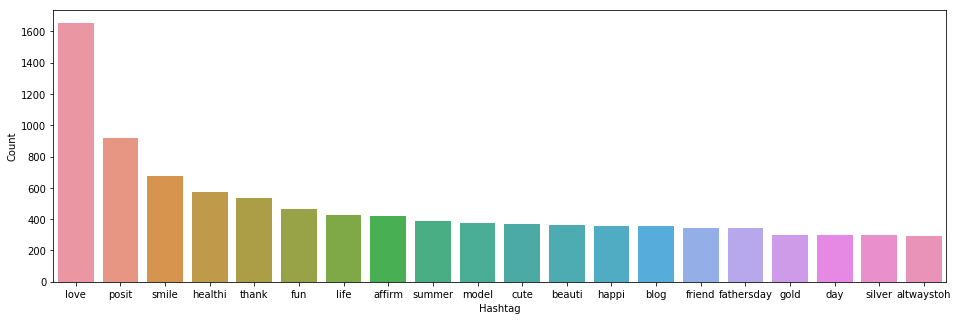

In [298]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags   
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.show()

# Racist/Sexist Tweets

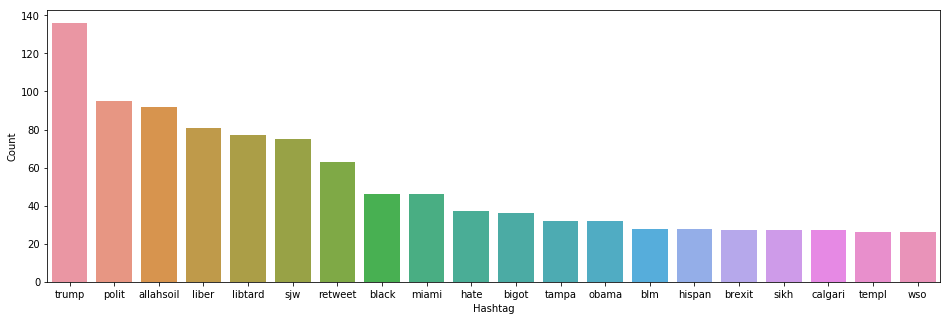

In [299]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")


In [300]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

In [301]:
#BoW
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['tweet']) 
bow.shape #it is a matrix

#BoW for test
bow_vectorizer_test = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_test = bow_vectorizer_test.fit_transform(test['tweet']) 
bow_test.shape #it is a matrix

(17197, 1000)

In [302]:
#TF-IDF= TF*IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(train['tweet']) 
tfidf.shape



(31962, 1000)

In [303]:
#TF-IDF= TF*IDF for test
tfidf_vectorizer_test = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf_test = tfidf_vectorizer_test.fit_transform(test['tweet']) 
tfidf_test.shape


(17197, 1000)

In [304]:
#!pip install gensim

In [305]:
import gensim
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 


In [306]:
tokenized_tweet_test = test['tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet_test,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 


In [307]:
model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(3358214, 4297960)

In [308]:
model_w2v.test(tokenized_tweet_test, total_examples= len(test['tweet']), epochs=20)

AttributeError: 'Word2Vec' object has no attribute 'test'

In [309]:
model_w2v.wv.most_similar(positive="dinner")

[('#restaur', 0.6658740043640137),
 ('#dairyfre', 0.6652425527572632),
 ('chees', 0.6649482250213623),
 ('smoothi', 0.6437889933586121),
 ('spici', 0.637910008430481),
 ('#yesaward', 0.6375445127487183),
 ('#miracl', 0.6374639868736267),
 ('#bu', 0.6332614421844482),
 ('besti', 0.6301704049110413),
 ('#essex', 0.6297756433486938)]

In [310]:
model_w2v.wv.most_similar(positive="trump")

[('#dumptrump', 0.5892897844314575),
 ('croni', 0.5858986973762512),
 ('hillari', 0.5803929567337036),
 ('jibe', 0.574514627456665),
 ('deepak', 0.5738926529884338),
 ('raza', 0.5722664594650269),
 ('sway', 0.5720866918563843),
 ('presidenti', 0.5720046758651733),
 ('putin', 0.5619221329689026),
 ('#epicfail', 0.5618488788604736)]

In [311]:
#vector representation of any word from our corpus
model_w2v['food']

array([-0.85120308, -0.23455112,  0.39400259, -0.56594515,  0.10441151,
       -0.09098087, -0.08227172, -0.40057662, -0.47611916, -0.32447758,
       -0.08271017,  0.00201974, -0.25001758,  0.37961984, -0.06473194,
        0.66821754,  0.20083621, -0.05555787, -0.37734884,  0.23951581,
       -0.05941724, -0.00983195,  0.42806199, -0.40801942,  0.50553083,
       -0.21253949,  0.78577167, -0.06071375, -0.19121398, -0.21689253,
       -0.3553679 ,  0.51019555,  0.1093447 , -0.32014707,  0.12218019,
        0.09029359, -0.00513031, -0.37143156, -0.01921622, -0.23210709,
       -0.50744128, -0.41837135, -0.30205914, -0.32162467, -0.35817856,
       -0.24550483, -1.03049493, -0.01761061, -0.4253763 , -0.00385093,
        0.12311157,  0.69419801, -0.79458719,  0.11337081, -0.55430406,
       -0.30201691, -0.59387636, -0.2563332 , -0.25233951, -0.25732043,
        0.0145312 , -0.43906164,  0.29305792,  0.03239099, -0.00611844,
        0.00591574, -0.04138393,  0.60272157,  0.11025231, -0.01

In [312]:
len(model_w2v['food']) #The length of the vector is 200

200

In [313]:
#function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     continue
            if count != 0:
                vec /= count
    return vec

In [314]:
#Preparing word2vec feature set…
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape    


(31962, 200)

In [315]:
#Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

In [316]:
wordvec_arrays = np.zeros((len(tokenized_tweet_test), 200)) 
for i in range(len(tokenized_tweet_test)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet_test[i], 200)
    wordvec_df_test = pd.DataFrame(wordvec_arrays) 
wordvec_df_test.shape    


(17197, 200)

In [317]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score



In [318]:
#BoW features
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, train['label'],random_state=42, test_size=0.3) 
lreg = LogisticRegression() 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.53686826843413415

In [319]:
test_pred = lreg.predict_proba(bow_test)
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('C:/Users/hp/Desktop/Analytics Vidhya/Twitter Sentiment Analysis/sub_lreg_bow2.csv', index=False) # writing data to a CSV file

In [320]:
#TF-IDF Features
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf, train['label'],random_state=42, test_size=0.3) 
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.53968253968253965

In [321]:
#Word2Vec Features
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(wordvec_df, train['label'],random_state=42, test_size=0.3) 
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.50310008857395927

In [322]:
from xgboost import XGBClassifier

In [323]:
#XGB on word2vect
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)


0.58964879852125696

In [326]:
test_pred_final = xgb.predict_proba(wordvec_df_test)
test_pred_int_final = test_pred_final[:,1] >= 0.3 
test_pred_int_final = test_pred_int_final.astype(np.int) 
test['label'] = test_pred_int_final 
submission = test[['id','label']] 
submission.to_csv('C:/Users/hp/Desktop/Analytics Vidhya/Twitter Sentiment Analysis/sub_final.csv', index=False) # writing data to a CSV file